# Linear Regression - Scikit-Learn Performamce Evaluation

În cadrul acestei părți o să discutăm în mare parte de evaluare performanței unui model de regresie. După ce am antrenat un model și am făcut anumite predicții, cum putem verifica dacă acele predicții sunt întradevăr bune? Pentru partea de evaluare o să ne folosim de label-urile din setul de date de testare (y_test). Pentru evaluare unui task de regresie (care este un task de predicție pentru un Feature de tip continuous) există mai multe metrici pe care le putem utiliza:

- Mean Absolut Error

- Mean Squared Error

- Root Mean Squared Error

### Mean absolute error

Această metrică este cea mai simplă dintre toate. Ce face aceasta mai exact? Pentru fiecare predicție ia valoarea și o compară cu valoarea adevărată a acelui feature (predictions vs y_test). Diferența dintre aceste valori o ia ca și valoare absolută (valori pozitive), le adună pe fiecare și se împartea suma finală la numărul total de predicții. Acestă metrică nu este destul de utilizată deoarece pentru cazurile în care avem un număr mic de elemente pentru care nu face predicții bune, diferența aceea de valoare (care este mai mare) nu va fi vizibilă deoarece se compensează cu valorile mai mici. Dacă dintr-un total de 60 de valori prezise, 4 dintre acestea au o diferență mare între valoarea adevărată și cea prezisă, aceste valori o să fie compensate de celelate 56 care sunt mai mici, lucru care nu este tocmai util. Aici întră în calcul cea de a doua metrică

### Mean Squared Error

Diferența dintre Mean Absolute Error și Mean Squared Error este faptul că cea de a doua ia ca și diferență valoarea ridicată la pătrat, iar prin acest mod cele care au o valoare mai mare o să fie pedepsite mai mult deoarece ies în evindeță mult mai tare față de cele care sunt mai apropiate de adevăr. Problema cu această metrică este faptul că se returnează valoarea la pătrat a diferenței de valori, ceea ce nu este tocmai un caz bun

### Root Mean Squared Error

Pentru Root Mean Squared Error, aceasta preia valoarea de la Mean Squared Error și returnează rădăcina pătrată (radicalul) valorii respective, astfel încât valorea returnată este cea adevărată. Această metrică este cea mai des utilizată pentru a evalua performața unui model de Regresie

Întrebarea care vine acuma este "Care este o valoare acceptabilă pentru RMSE ?" (Root Mean Squared Error). Răspunsul la această întrebare depinde foarte mult de context. O eroare de 10$ pentru predicții la o casă este fantanstică pentru predicții, în timp ce aceeași eroare pentru predicția la prețul unei acadele reprezintă o eroare extrem de mare (prea mare chiar). Un lucru util ar fi iar de a compara valoarea medie din labels cu valoare returnată de o anumită metrică (RMSE). În continuare o să calculăm aceste metrici cu Scikit-Learn

In [1]:
# importing the libraries neede
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data
df = pd.read_csv('../data/08-Linear-Regression-Models/Advertising.csv')

In [3]:
# print the head of the data
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# extract X and y from the data
# X = Features
# y = labels

X = df.drop(columns='sales')
y = df['sales']

In [5]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [6]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [8]:
# importing the libraries from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
# split the date into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
# instantiate the model
model = LinearRegression()

In [11]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# make predictions
predictions = model.predict(X_test)

In [13]:
predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

După ce am antrenat modelul am creat și anumite predicții (pentru X_test) pe care le-am salvat în variabila predictions. Aceste predicții trebuie comparate cu y_test, variabilă care deține valorile adevărate pentru feature-urile din X_test (pentru care s-au făcut predicții). După cum am aflat, există mai multe modalități prin care putem să facem această comparație. Acele metrici le putem importa din modulul sklearn.metrics

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Pentru început o să ne uităm la valoarea medie de sales din DataFrame-ul inițial și la distribuția acelor valori

In [16]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

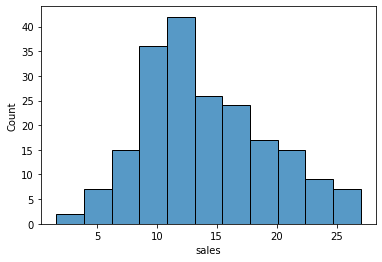

In [17]:
sns.histplot(data=df, x='sales')

In [18]:
help(mean_absolute_error)

Help on function mean_absolute_error in module sklearn.metrics._regression:

mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
    Mean absolute error regression loss.
    
    Read more in the :ref:`User Guide <mean_absolute_error>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    multioutput : {'raw_values', 'uniform_average'}  or array-like of shape             (n_outputs,), default='uniform_average'
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
    
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
    
        '

Dacă aruncăm o privire peste documentația de la mean_absolute_error putem vedea că aceasta are nevoie de două argumente, și anume y_true și y_pred. y_true reprezintă label-urile adevărate ale feature-urilor pentru care s-au făcut predicții (adică y_test), iar y_pred reprezintă valorile care au fost prezise de către model

In [19]:
mean_absolute_error(y_test, predictions)

1.2137457736144808

Același comportament îl are și metoda de mean_squared_error. Are nevoie de aceiași parametrii pentru a afla valoare acestei metrici

In [20]:
mean_squared_error(y_test, predictions)

2.298716697886378

Putem observa că valorea pentru această eroare este 2.298, ceea ce este mai mare decât mean_absolute_error, dar după cum am zis, ceea ce returnează mean_squared_error reprezintă valoarea ridicată la pătrat. Pentru a afla valoarea adevărată putem să scoatem de sub radical acea valoare utilizând np.sqrt()

In [21]:
np.sqrt(mean_squared_error(y_test, predictions))

1.5161519375993877

Acum putem observa că cele două valori sunt destul de apropiate. Se pot utiliza ambele metrici pentru a vedea dacă în general avem un model bun (valoarea de la mean_absolute_error ne spune asta) și pentru a vedea dacă există anumite cazuri unde predicțiile nu sunt tocmai bune (asta se află din valoarea de mean_squared_error sau RMSE)

## Recapitulare

În cadrul acestei părți am învățat:

    1. Care sunt cele trei metrici prin care putem verifica performanța unui task de regresie

        Mean Absolute Error

        Mean Squared Error

        Root Mean Squared Error

    2. Cum să importăm metodele din Scikit-Learn care se ocupă de partea de metrici

        from sklearn.metrics import mean_absolute_error

        from sklearn.metrics import mean_squared_error

    3. Cum să utilizăm aceste metode

        mean_absolute_error(y_true, y_pred)

        mean_square_error(y_true, y_pred)

    4. Cum să obținem RMSE din mean_squared_error

        np.sqrt(mean_squared_error(y_true, y_pred))